# A Beginner’s Guide to Carry out Extreme Value Analysis (6) - Application of IDF Curves

Intensity Duration Frequency (IDF) curves are a standard tool routinely used in the planning and designing of municipal drainage, stormwater, flood management, and wastewater infrastructure.

An example is abstracted from the book of 'Hydrologic analysis and design' to show how to use IDF information for planning and designing roof drainage. It is obvious that rooftop drainage is an important element of building design. Improper drainage can lead to building leakage and damage problems. A number of methods are available for designing roof drains; an approximation will be provided here.

However, this part is already beyond the scope of extreme value analysis. More basic perception for the common application of IDF information as currently used by practitioners can be found at 
https://www.linkedin.com/post/edit/brief-introduction-how-apply-idf-information-chonghua-yin.

## Problem statement

The objective of a design is to size the vertical leader (see the following Figure), the vertical drains, and the horizontal drain pipes drain rooftop runoff	for	a 10-year design storm at the duration of 0.1 hour (i.e., 6 minutes).

![img](C:\Users\Roaylosyin\Documents\ShareX\Screenshots\2017-08\chrome_2017-08-28_10-26-23.png)

To use the design method provided here, the following variables are required input: 
* the roof area and layout, 
* the rainfall intensity-duration-frequency relationship for the location,
* and the slope of the horizontal drains located in the roof.

The design procedure is as follows:
* Determine the design rainfall intensity based on the duration and frequency specified in the local policy.
* Determine the number of drains.
* Determine the flow capacity per drain.
* Design the system by computing the size of the leader, vertical drains, and horizontal drains.

## 1. Design rainfall – IDF curves

The rainfall information, specifically the design return period and storm duration, is usually set by local building codes; for
example, the code might state that the design rainfall is the 5-yr, 0.1-hr intensity. The design method assumes that all rainfall is converted to runoff; that is, the method assumes that there are no losses such as depression storage.

In [1]:
from pandas import *
import pandas as pd
from collections import OrderedDict

%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

### 1.1 Load IDF Curves

The IDF curves are produced in Part 5. Now read it directly using pandas.read_pickle,

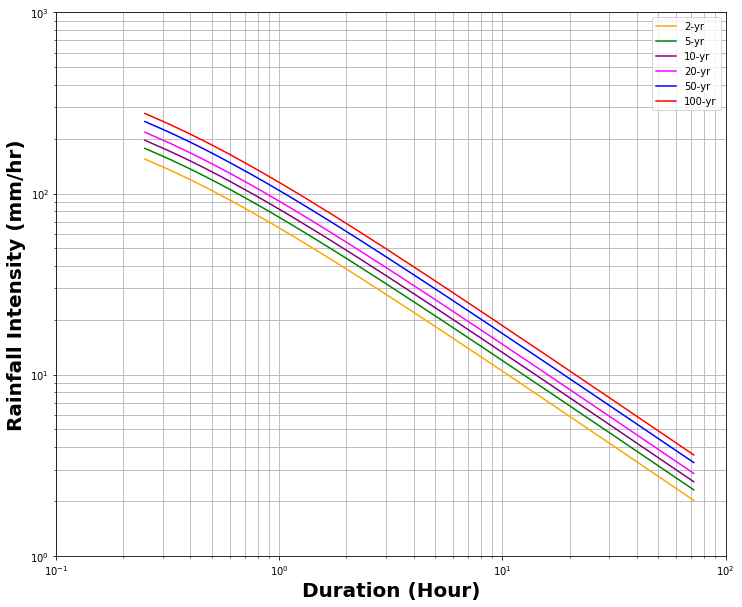

In [2]:
inh = pd.read_pickle('idf.pickle')

ag = inh.plot(color=['orange', 'green', 'purple', 'magenta', 'blue','red'])

ag.set_yscale('log')
ag.set_xscale('log')

plt.xlim([0.1,100])
plt.ylim([1, 1000])
plt.grid(True,which="both", ls="-")

plt.xlabel("Duration (Hour)", fontsize=20, fontweight = 'bold')
plt.ylabel("Rainfall Intensity (mm/hr)", fontsize=20,fontweight = 'bold')

### 1.2 Design	rainfall – RP choice

Local drainage policy rainfall requirement:
* 10-year return period,	
* 0.1-hour duration (6 min)

According to these requirments, the rainfall can be derived from the above IDF curves, or calculated from the IDF formula in Part 5: IDF relationship can be written in the form of

$$I = a*T^k/(D + b)^c$$

where $I$ is the rainfall intensity (mm/hr), $D$ is the rainfall duration (hr), $T$ is a specific return year, while and $a, b, c$ and $k$ are coefficients.

Here, these coeffiecients are copied from Part 5:

In [3]:
T = 10.0
D = 0.1
a = 29.725577
b = 0.156819
c = 0.838008
k = 0.493790

Calculate rainfall intensity (T=10 and D=0.1) and convert its unit from mm/hr of ft/hr

In [4]:
Intensity_mm = a*T**k/(D + b)**c
Intensity_in = Intensity_mm/25.4
Intensity_in

11.39787126831546

## 2. Determine the number of drains

As a general rule, there should be one drain per 10,000 $ft^2$ of roof area, with a minimum of two drains per roof. Thus, the design method will be illustrated for a commercial building with a flat roof of 80,000 $ft^2$ (200 x 400 ft). Thus according to the rule of thumb, a total of eight drains will be required.

In [5]:
A = 80000.0
npipe = A/10000.0 
npipe

8.0

## 3. Determine the flow capacity per drain

### 3.1 Based on the policy statement or local building codes, the design rainfall intensity is obtained from the above calculation. The Intensity_in (I) can be converted to a unit discharge rate $Q_u$ in gal/min/sq. ft of roof area using:

Qu = 0.0104*I

In [6]:
Qu = 0.0104 * Intensity_in
Qu

0.11853786119048079

### 3.2 The total discharge rate Qn for a rooftop of area A in sq. ft is

Qn = Qu*A

In [7]:
Qn = Qu * A
Qn

9483.028895238464

### 3.3 The capacity per drain Qd, equals the total flow Qn divided by the number of drains, n. Qn and Qd have units of volume per unit time and thus correspond to a peak discharge. 

In [8]:
Qd = Qn /npipe

## 4. Design the system by computing the size of the leader, vertical drains, and horizontal drains

### 4.1 The diameter d (in.) of both the leader and the vertical drains is given by

d = 0.6*Qd^0.377

In [9]:
d_lv = 0.6*Qd**0.377
print([Qd,d_lv])

[1185.378611904808, 8.649587016895287]


### 4.2 The diameter of horizontal pipes in in. is a function of both Qd and the slope of the horizontal drain S in in./ft

d = 0.53*S^-0.188*Qd^0.377

#### 4.2.1 If the horizontal pipe draining the four interior leaders in the interior walls are laid at a slope of 0.5 in./ft, these would require the following diameter:

In [10]:
S   = 0.5
d_h = 0.53*S**-0.188*Qd**0.377
d_h

8.703894745376944

#### 4.2.2 If the horizontal pipes leading from the roof drains to the wall are set at a slope of 0.125 in./ft, a required diameter of

In [11]:
S   = 0.125
d_h = 0.53*S**-0.188*Qd**0.377
d_h

11.295381634433912

### 4.3 selection of commercial pipes
For roof drains, the following pipe diameters (in.) are usually available commercially: 2,4,6, 8, 10, 12, 15, 18.

Diameters estimated with above Equationsshould be rounded up to the next larger commercially available size so that the pipe capacity will be sufficient to drain the design flow Qd. 

## End Notes

Through this guide I have tried to give you a basic idea how to carry out extreme value analysis (EVA) upon a time series data of interest.

This simple guide consists of
* basic analysis steps
* fitting multiple extrme value distribution
* confidential intervals
* producing DDF curves
* producing IDF curves
* A simple applicaion of IDF curves

As I always said:
This is just a start. You can try more